# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy

In [2]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

#### Метрика
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика RMSE. Ее и нужно реализовать.

In [3]:
def rmse(y_true, y_predicted):
     return (1/len(y_true) * sum((y_predicted - y_true) ** 2)) ** 0.5


Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [4]:
from numpy.linalg import linalg


class NormalLR:
    def __init__(self, alpha):
        self.alpha = alpha
        self.w = None

    def fit(self, X, y):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        X_tr = np.transpose(X)
        self.w = np.matmul(np.matmul(linalg.inv(np.matmul(X_tr,X) + self.alpha * np.identity(X.shape[1])), X_tr), y)

    def predict(self, X):
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        return np.matmul(X, self.w)

In [5]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
regr = NormalLR(0.01)
regr.fit(X_train, y_train)
print(rmse(y_test, regr.predict(X_test)))

0.10166961152302144


1. Выполните загрузку и предобработку файлов x_boston_train и y_boston_train.
2. Разбейте x_boston_train и y_boston_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрику RMSE для моделей LR. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Постройте график зависимости ошибки от коэффициента регуляризации. 

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
X = pd.read_csv("../input/homework-linear-regression/x_boston_train.csv").drop('Id', axis=1).to_numpy()
y = pd.read_csv("../input/homework-linear-regression/y_boston_train.csv").drop('Id', axis=1).to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(X), y, train_size=0.8, shuffle=False)

0.007110000000000001


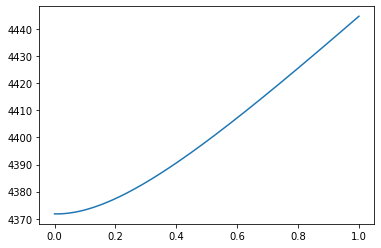

In [8]:
alphas = np.arange(0, 1, 0.00001)
errors = []
for alpha in alphas:
    regr = NormalLR(alpha)
    regr.fit(X_train, y_train)
    errors.append(rmse(y_test, regr.predict(X_test)))
errors = np.array(errors)
print(alphas[np.argmin(errors)])
plt.plot(alphas, errors)
# best
regr = NormalLR(0.007110000000000001)
regr.fit(X_train, y_train)

Обучите модель на всех данных из x_boston_train и y_boston_train.
Сделайте submit своего решения и получите значение RMSE_score не более 5000

In [9]:
test = pd.read_csv('../input/homework-linear-regression/x_boston_test.csv')
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test["Id"]
test = test.drop('Id', axis = 1).to_numpy()
MinMaxScaler().fit(test)
submission["Expected"] = regr.predict(scaler.transform(test))
submission.to_csv('submission.csv', index=False)